This notebook was made to understand whare are we dealing with the **MNIST** dataset. So we need to make some Explanatory Data Analysis.

**Dataset Overview** :

1. Origin: 

    - Created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges.
    
    - It is a subset of a larger set available from NIST.
    
    - MNIST "mixed" these to ensure the trainingand testing distributions were similar.

2. Specifications:

    - Total Images: 70,000 handwritten digits (0-9).

    - Split: 60,000 training samples, 10,000 test samples.

    - Dimensions: 28x28 pixels, grayscale (single channel).

3. Fact : 

    - It was the benchmark dataset used to prove the efficiency of Convolutional Neural Networks (LeNet-5) in the late 1990s.


In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from collections import Counter

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
data = train_dataset.data.float() / 255.0
targets = train_dataset.targets

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:30<00:00, 320kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 255kB/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.29MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
print(f"   data dimension : {data.shape}") # (N, H, W)

   data dimension : torch.Size([60000, 28, 28])


In [5]:
print(f"   target dimension : {targets.shape}")

   target dimension : torch.Size([60000])


In [6]:
print(f"   data type : {data.dtype}")

   data type : torch.float32


In [14]:
class_counts = Counter(targets.numpy())
classes = list(range(10))
counts = [class_counts[i] for i in classes]

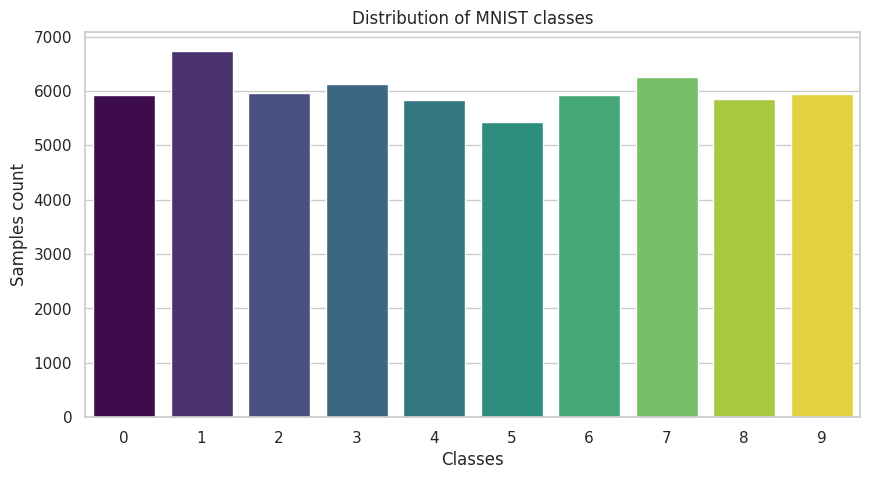

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=counts, palette="viridis",hue=classes,legend=False)
plt.title("Distribution of MNIST classes")
plt.xlabel("Classes")
plt.ylabel("Samples count")
plt.show()

In [16]:
loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
images, labels = next(iter(loader))

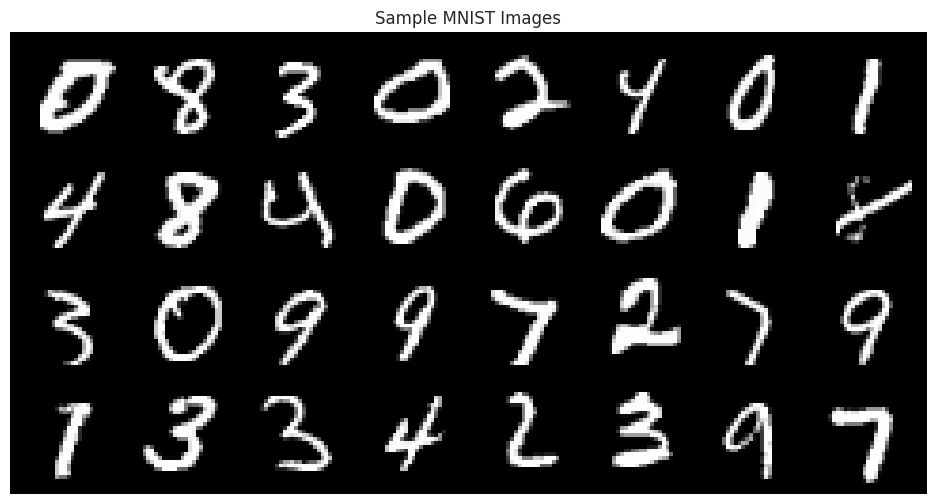

In [17]:
grid_img = torchvision.utils.make_grid(images[:32], nrow=8, padding=2)

plt.figure(figsize=(12, 6))

plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off')
plt.title("Sample MNIST Images")
plt.show()